In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to the range [0, 1]

# Build a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=5)  # You can adjust the number of epochs as needed

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Make predictions using the trained model
predictions = model.predict(x_test)

# Example: Predict the first test image
import numpy as np
predicted_label = np.argmax(predictions[0])
print(f"Predicted label for the first test image: {predicted_label}")


11490434/11490434 [==============================] - 14s 1us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2572 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1137 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0787 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0583 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9769
Test accuracy: 0.9768999814987183
313/313 [==============================] - 1s 2ms/step
Predicted label for the first test image: 7


Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2797 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0979 - accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0691 - accuracy: 0.9807
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0563 - accuracy: 0.9844
Epoch 5/5
313/313 [==============================] - 4s 10ms/step - loss: 0.0371 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


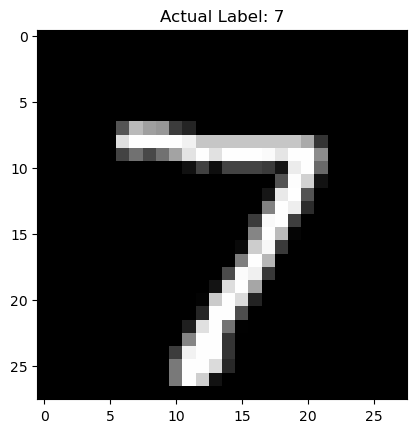

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Expand dimensions for CNN input
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Choose an image from the test set to visualize
image_index = 0  # Change this index to view different images

# Display the image
plt.figure()
plt.imshow(test_images[image_index].squeeze(), cmap='gray')
plt.title(f'Actual Label: {test_labels[image_index]}')
plt.show()


